In [4]:
import urllib.request
import pandas as pd

In [3]:
gff_files_and_source_urls = {"S_aureus.gff.gz" : "ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/013/425/GCF_000013425.1_ASM1342v1/GCF_000013425.1_ASM1342v1_genomic.gff.gz",
                           "S_typhimurium.gff.gz" : "ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/195/995/GCF_000195995.1_ASM19599v1/GCF_000195995.1_ASM19599v1_genomic.gff.gz",
                           "E_coli.gff.gz":"ftp://ftp.ncbi.nlm.nih.gov/genomes/refseq/bacteria/Escherichia_coli/reference/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz"}

In [2]:
import matplotlib.pyplot as plt

/Users/BioDataProjectManager/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


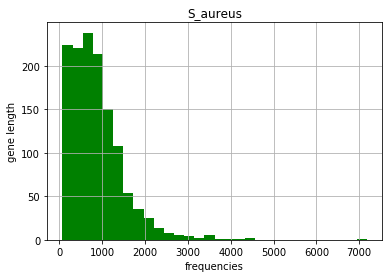

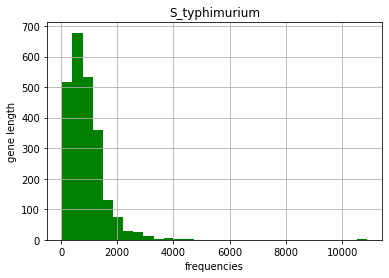

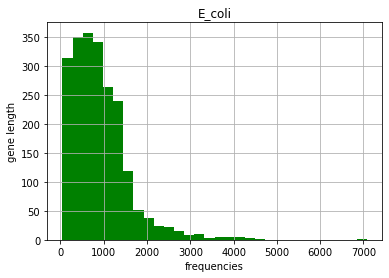

In [26]:
for gff_file, source_url in gff_files_and_source_urls.items():
    urllib.request.urlretrieve(source_url, gff_file)
    gff_data = pd.read_csv(gff_file, sep = "\t", comment= "#", names=["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"])
    gff_data[(gff_data["strand"] == "+") & (gff_data["type"] == "gene")]
    gff_data_genes = gff_data[(gff_data["strand"] == "+") & (gff_data["type"] == "gene")]
    gff_data_genes["length"] = gff_data_genes["end"] - gff_data_genes["start"] + 1
    ax = gff_data_genes["length"].hist(bins = 30, color = "green", align = "mid")
    ax.set_title(gff_file[:-7])
    ax.set_ylabel("gene length")
    ax.set_xlabel("frequencies")
    plt.show()
    fig = ax.get_figure()
    basename = gff_file[:-7]
    fig.savefig(basename + ".png")